<a href="https://colab.research.google.com/github/elianramon/Ciencias_de_Dados_ONE_Challenge/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados

Fui contratado para definir qual das lojas da rede Maria's deve ser vendida.

Vamos descobrir qual é a loja com o menor faturamento.


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
def caracteristicas (dataset):
    print(f'Tamanho: {dataset.shape}\n')
    print(f'Colunas: {dataset.columns}\n')
    print(f'Informações: {dataset.info()}\n')
    print(f'Descrição: {dataset.describe()}\n')
    print(f'Valores nulos: {dataset.isnull().sum()}')

In [3]:
caracteristicas(loja)

Tamanho: (2359, 12)

Colunas: Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int6

#1. Análise do faturamento



In [4]:
def faturamento(dataset, i):
  fat = dataset['Preço'].sum()
  print(f' Faturamento Loja {i}: {fat}\n')
  return fat

In [5]:
a1 = faturamento(loja, 1)
a2 = faturamento(loja2, 2)
a3 = faturamento(loja3, 3)
a4 = faturamento(loja4, 4)

 Faturamento Loja 1: 1534509.12

 Faturamento Loja 2: 1488459.06

 Faturamento Loja 3: 1464025.03

 Faturamento Loja 4: 1384497.58



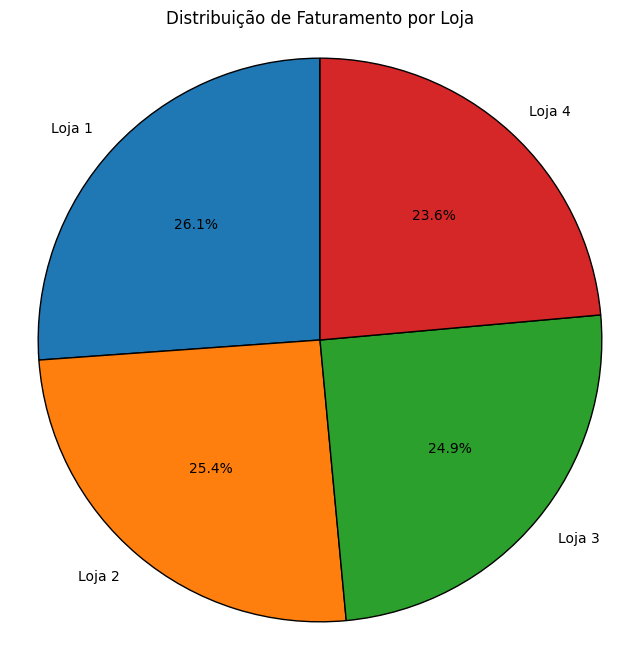

In [28]:
import matplotlib.pyplot as plt

dados_faturamento = {    # 1. Dados de Faturamento
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [1534509.12, 1488459.06, 1464025.03, 1384497.58]
}
df_faturamento = pd.DataFrame(dados_faturamento) # 2. Criar o DataFrame
df_faturamento = df_faturamento.set_index('Loja')

plt.figure(figsize=(8, 8))

plt.pie(
    df_faturamento['Faturamento'],
    labels=df_faturamento.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribuição de Faturamento por Loja')
plt.axis('equal')
plt.show()

In [6]:
faturamentos_por_loja = {      # Armazenar os dados em um DICIONÁRIO
    "Loja 1": a1,
    "Loja 2": a2,
    "Loja 3": a3,
    "Loja 4": a4        }

loja_com_maior_faturamento = max(faturamentos_por_loja, key=faturamentos_por_loja.get)
loja_com_menor_faturamento = min(faturamentos_por_loja, key=faturamentos_por_loja.get)

maior_faturamento = faturamentos_por_loja[loja_com_maior_faturamento]
menor_faturamento = faturamentos_por_loja[loja_com_menor_faturamento]

print(f"O maior faturamento foi: {loja_com_maior_faturamento} Valor: R$ {maior_faturamento:.2f}")
print(f"O maior faturamento foi: {loja_com_menor_faturamento} Valor: R$ {menor_faturamento:.2f}")

O maior faturamento foi: Loja 1 Valor: R$ 1534509.12
O maior faturamento foi: Loja 4 Valor: R$ 1384497.58


# 2. Vendas por Categoria

In [7]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


,count
Categoria do Produto,
utilidades domesticas,171
livros,173
instrumentos musicais,182
esporte e lazer,284
eletrodomesticos,312
brinquedos,324
eletronicos,448
moveis,465


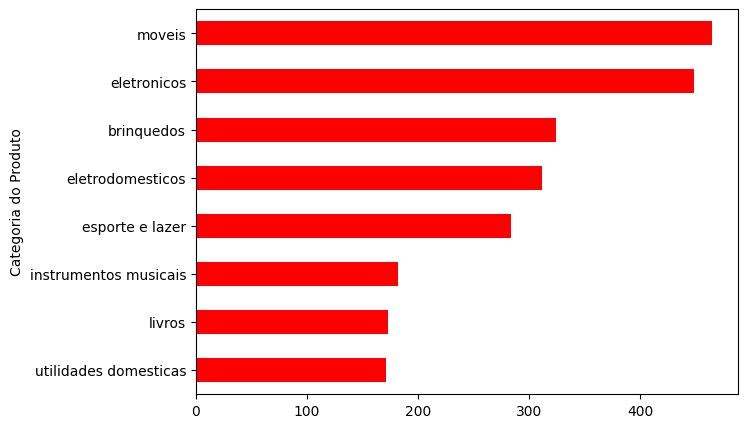

In [8]:
def categorias(dataset):
  #data = dataset.groupby('Categoria do Produto')["Categoria do Produto"].value_counts()
  data = dataset['Categoria do Produto'].value_counts() # Outra forma de fazer a mesma coisa
  data = data.sort_values(ascending=True)

  data.plot(kind='barh', figsize=(7, 5), color ='red');
  return data

categorias(loja)

,count
Categoria do Produto,
utilidades domesticas,181
livros,197
instrumentos musicais,224
esporte e lazer,275
eletrodomesticos,305
brinquedos,313
eletronicos,422
moveis,442


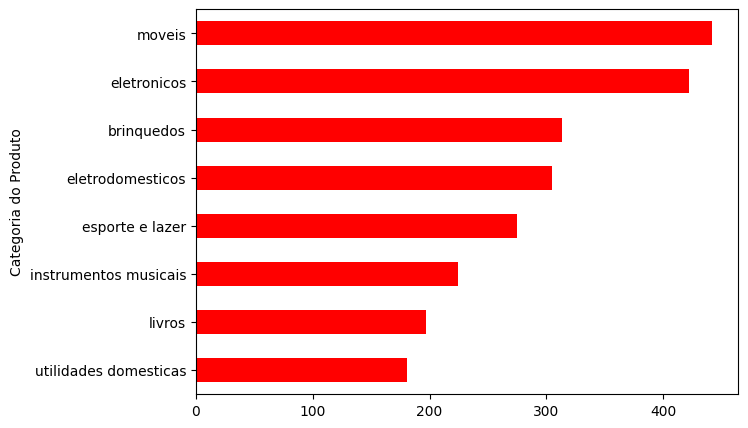

In [9]:
categorias(loja2)

,count
Categoria do Produto,
instrumentos musicais,177
utilidades domesticas,177
livros,185
esporte e lazer,277
eletrodomesticos,278
brinquedos,315
eletronicos,451
moveis,499


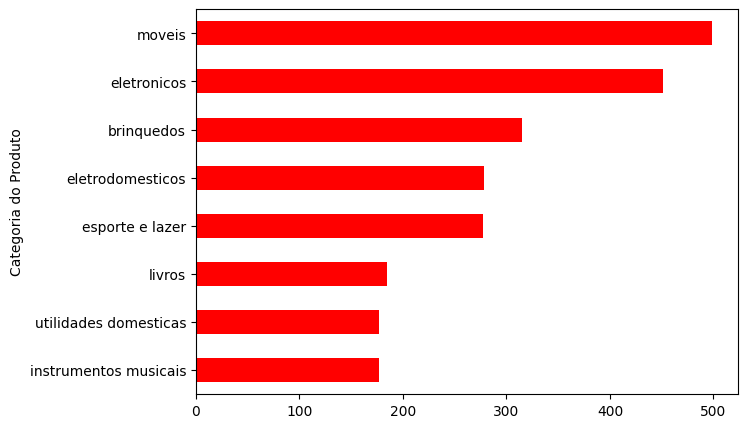

In [10]:
categorias(loja3)

,count
Categoria do Produto,
instrumentos musicais,170
livros,187
utilidades domesticas,201
eletrodomesticos,254
esporte e lazer,277
brinquedos,338
eletronicos,451
moveis,480


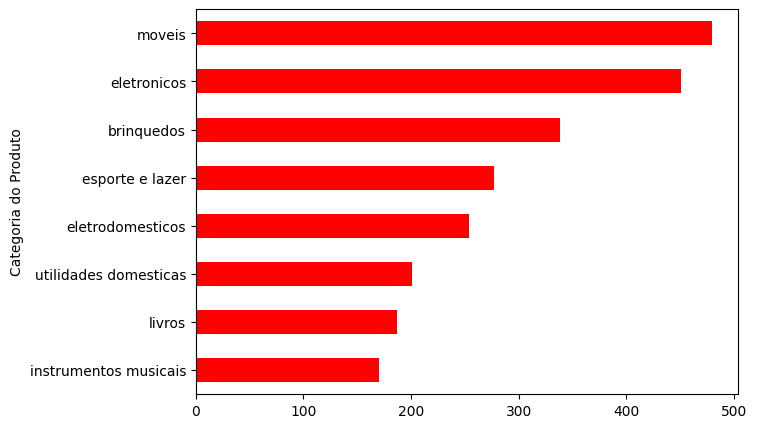

In [11]:
categorias(loja4)

# 3. Média de Avaliação das Lojas


In [12]:
loja.head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
5,Blocos de montar,brinquedos,32.26,0.000000,03/12/2020,Beatriz Moraes,RS,5,cupom,1,-30.17,-53.50
6,Boneca bebê,brinquedos,58.90,0.000000,07/08/2021,João Souza,SP,3,boleto,1,-22.19,-48.79
7,Lava louças,eletrodomesticos,1586.23,84.993080,18/06/2021,Felipe Santos,CE,5,cartao_credito,10,-5.20,-39.53
8,Lavadora de roupas,eletrodomesticos,2024.31,105.372857,08/01/2022,Thiago Silva,SP,1,cartao_credito,5,-22.19,-48.79
9,Carrinho controle remoto,brinquedos,100.26,6.737659,24/02/2020,Beatriz Moraes,SP,5,boleto,1,-22.19,-48.79


In [13]:
def avaliacao(data):
    print('Avaliação de:', data['Avaliação da compra'].mean()) # Varia de 0 a 5

avaliacao(loja)
avaliacao(loja2)
avaliacao(loja3)
avaliacao(loja4)

#Loja 1 é a menos bem avaliada, mesmo assim, é a qual tem o maior faturamento

Avaliação de: 3.976685036032217
Avaliação de: 4.037303942348453
Avaliação de: 4.048325561678677
Avaliação de: 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

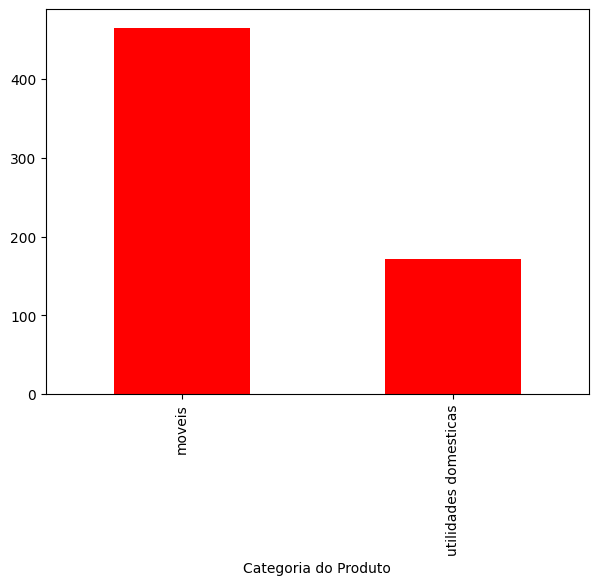

In [14]:
def mais_vendas(data):
    cont1 = data['Categoria do Produto'].value_counts().head(1) # Já ordenamos anteriormente, vamos usar isso
    cont2 = data['Categoria do Produto'].value_counts().tail(1)
    a = pd.concat([cont1, cont2])
    a.plot(kind='bar', figsize=(7, 5), color ='red');

mais_vendas(loja)

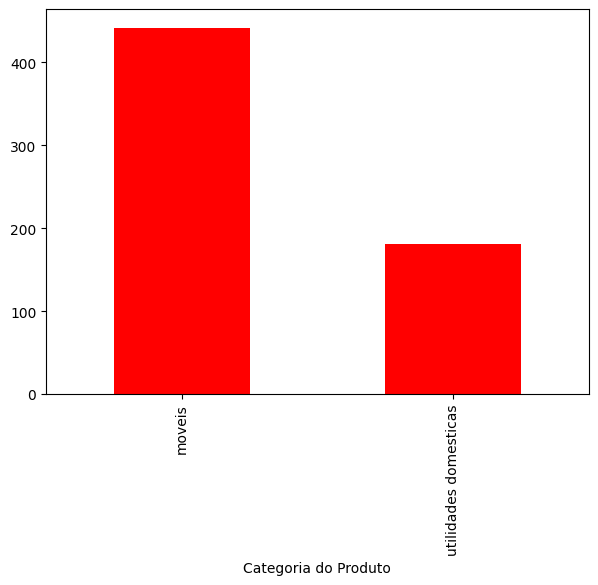

In [15]:
mais_vendas(loja2)

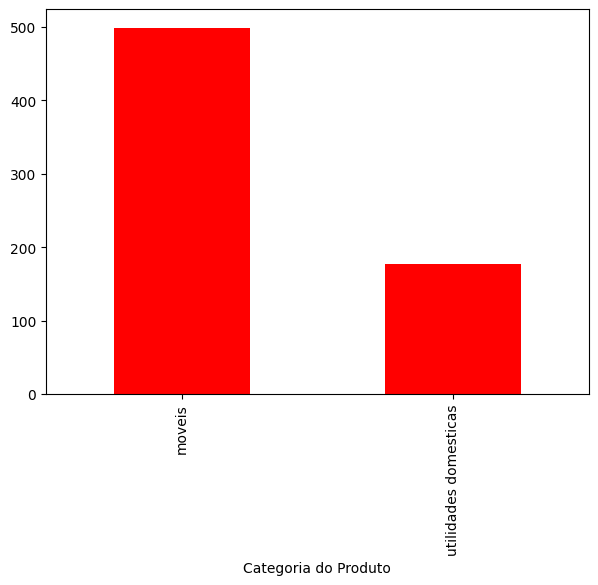

In [16]:
mais_vendas(loja3)

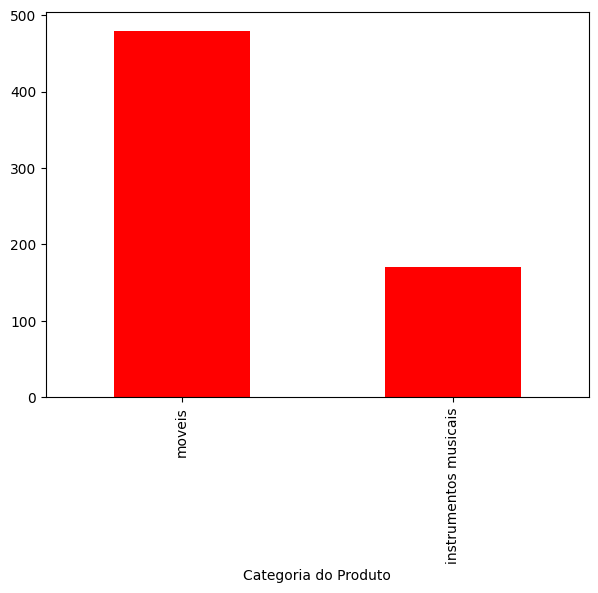

In [17]:
mais_vendas(loja4)

Todas as lojas possuem os mesmos produtos mais e menos vendidos

# 5. Frete Médio por Loja

In [18]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [19]:
print(loja.groupby('Categoria do Produto')['Frete'].mean()) # Frete em relação a categoria
loja['Frete'].mean() # Frete médio geral

Categoria do Produto
brinquedos                4.029278
eletrodomesticos         82.580002
eletronicos              68.346001
esporte e lazer           9.961646
instrumentos musicais    35.779153
livros                    3.598210
moveis                   28.660661
utilidades domesticas     5.016968
Name: Frete, dtype: float64


np.float64(34.69180491551149)

In [20]:
loja2['Frete'].mean() # Frete médio geral

np.float64(33.62194065817927)

In [21]:
loja3['Frete'].mean() # Frete médio geral

np.float64(33.07446427411743)

In [22]:
loja4['Frete'].mean() # Frete médio geral

np.float64(31.278997081841727)

# 6. Valor Médio por Categotias Mais Vendida

In [23]:
def valor_venda(data):
    cat = ['moveis', 'utilidades domesticas']
    loja_filtrada = data[data['Categoria do Produto'].isin(cat)] # inclui comente as linhas de cat
    print(loja_filtrada.groupby('Categoria do Produto')['Preço'].mean(), "\n") # Usar o groupby

valor_venda(loja)
valor_venda(loja2)
valor_venda(loja3)
valor_venda(loja4)

Categoria do Produto
moveis                   538.017441
utilidades domesticas     99.014503
Name: Preço, dtype: float64 

Categoria do Produto
moveis                   532.205158
utilidades domesticas    108.634586
Name: Preço, dtype: float64 

Categoria do Produto
moveis                   537.265651
utilidades domesticas    113.447514
Name: Preço, dtype: float64 

Categoria do Produto
moveis                   534.803437
utilidades domesticas     99.994179
Name: Preço, dtype: float64 



# Final

# Considerações

Fomos contratados para selecionar a loja com menor faturamento para colocar a venda.

## Qual loja vender? RESPOSTA: LOJA $4$, Por que?

1. Loja 1 com maior faturamento; Loja 4 com menor faturamento
- Maior = $R{$}$ $1,534,509.12$
- Menor = $R{$}$ $1,384,497.58$
___
2. Todas as lojas possuem os mesmos produtos mais e menos vendidos
- Moveis
- Utilidades domesticas
___
3. A média das avaliações de clientes por loja [0 a 5]:
- Loja 1: 3.976685036032217
- Loja 2: 4.037303942348453
- Loja 3: 4.048325561678677
- Loja 4: 3.9957591178965224

A melhor avaliação está relacionada a Loja 3, mas a menor é a Loja 1, menos com o maior faturamento. A Loja 4 é a segunda menor, o que fortalece a escolha pela quarta loja.
____
4. O frete médio de cada loja:
- Loja 1: 34.69180491551149
- Loja 2: 33.62194065817927
- Loja 3: 33.07446427411743
- Loja 4: 31.278997081841727

Sobre o frete, uma relação contrária foi percebida, a Loja 4 é a mais em conta e a primeira loja, a mais cara. Mesmo com tudo isso, a Loja 1 é a que tem maior faturamento.
____

# Por fim, vender a Loja 4
